# Stop Summary Analysis
## Sun & Fun 2021
### May 1, 2021 - July 31, 2021

The following notebook contains a descriptive analysis of the average daily activity for the PART Express system. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'D:\APC\Miguel_APC\Summer 2021'
engine = 'openpyxl'

In [3]:
df = pd.read_excel(path + '\stop_summary_summer_2021.xlsx', engine=engine)
df.head(2)

,DAY_OF_WEEK,ROUTE,DIR,TRIP_TIME,STOP_SEQUENCE,SAMPLES,ON,OFF,LOAD,stop_code,stop_name,stop_lat,stop_lon,route_long_name,SERVICE_PERIOD,USE_TIME
0,WKDY,6,Dir = 0,530,0,5,0.82,0.0,0.82,168,Mount Airy Park & Ride,36.480516,-80.605425,6 - Surry County Express,AM Peak,05:30:00
1,WKDY,6,Dir = 0,600,0,9,1.66,0.0,1.66,168,Mount Airy Park & Ride,36.480516,-80.605425,6 - Surry County Express,AM Peak,06:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DAY_OF_WEEK      4240 non-null   object 
 1   ROUTE            4240 non-null   int64  
 2   DIR              4240 non-null   object 
 3   TRIP_TIME        4240 non-null   int64  
 4   STOP_SEQUENCE    4240 non-null   int64  
 5   SAMPLES          4240 non-null   int64  
 6   ON               4240 non-null   float64
 7   OFF              4240 non-null   float64
 8   LOAD             4240 non-null   float64
 9   stop_code        4240 non-null   int64  
 10  stop_name        4240 non-null   object 
 11  stop_lat         4240 non-null   float64
 12  stop_lon         4240 non-null   float64
 13  route_long_name  4240 non-null   object 
 14  SERVICE_PERIOD   4240 non-null   object 
 15  USE_TIME         4240 non-null   object 
dtypes: float64(5), int64(5), object(6)
memory usage: 530.1+ KB


In [5]:
df.rename({
    'DAY_OF_WEEK': 'Day of Week',
    'ROUTE': 'Route ID',
    'DIR': 'Direction',
    'STOP_SEQUENCE': 'Stop Sequence',
    'ON': 'Boardings',
    'OFF': 'Alightings',
    'LOAD': 'Load',
    'stop_code': 'Stop Code',
    'stop_name': 'Stop Name',
    'stop_lat': 'Latitude',
    'stop_lon': 'Longitude',
    'route_long_name': 'Route Name',
    'SERVICE_PERIOD': 'Service Period',
    'USE_TIME': 'Trip Time'
}, axis=1, inplace=True)

df.drop(['TRIP_TIME', 'SAMPLES'], axis=1, inplace=True)

df.head(2)

,Day of Week,Route ID,Direction,Stop Sequence,Boardings,Alightings,Load,Stop Code,Stop Name,Latitude,Longitude,Route Name,Service Period,Trip Time
0,WKDY,6,Dir = 0,0,0.82,0.0,0.82,168,Mount Airy Park & Ride,36.480516,-80.605425,6 - Surry County Express,AM Peak,05:30:00
1,WKDY,6,Dir = 0,0,1.66,0.0,1.66,168,Mount Airy Park & Ride,36.480516,-80.605425,6 - Surry County Express,AM Peak,06:00:00


In [6]:
df.loc[df['Route ID'] == 9, 'Route Name'] = '9 - Davidson County Greensboro Express'

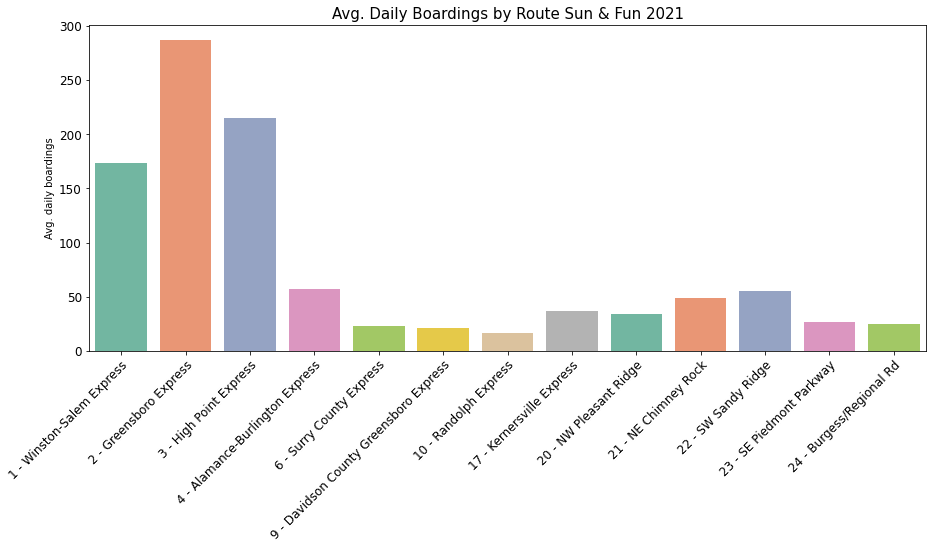

In [7]:
order = [
    '1 - Winston-Salem Express', '2 - Greensboro Express', '3 - High Point Express',
    '4 - Alamance-Burlington Express', '6 - Surry County Express', 
    '9 - Davidson County Greensboro Express', '10 - Randolph Express', '17 - Kernersville Express', 
    '20 - NW Pleasant Ridge', '21 - NE Chimney Rock', '22 - SW Sandy Ridge', 
    '23 - SE Piedmont Parkway', '24 - Burgess/Regional Rd'
]


boardings_by_route = df.groupby('Route Name')['Boardings'].sum().to_frame()

plt.figure(figsize=(15, 6))
ax = sns.barplot(
    x=boardings_by_route.index,
    y='Boardings',
    data=boardings_by_route,
    order=order,
    palette='Set2'
)

plt.title('Avg. Daily Boardings by Route Sun & Fun 2021', fontsize=15)
plt.xticks(rotation=45, rotation_mode='anchor', horizontalalignment='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Avg. daily boardings')

plt.show()

### Top 25 Stops by Average Daily Boardings

In [8]:
df.groupby('Stop Name').agg({
    'Boardings': 'sum',
    'Alightings': 'sum'
}).sort_values(by='Boardings', ascending=False)[0:25]

,Boardings,Alightings
Stop Name,,
Coble Transportation Center,414.33,563.81
Greensboro Depot Slip 16,135.99,111.43
High Point Terminal (Outer Slip),81.44,85.67
Winston-Salem Transportation Center (L-1),80.45,96.58
Four Seasons Mall,24.82,27.90
Motel 6,23.49,22.28
Manning Dr at UNC Hospitals,13.24,0.21
Mebane Cone Health Park & Ride,11.24,11.09
Hotel Area (National Service Rd),8.83,2.36


The first few stops are the transit centers. This makes sense. We expect most of the activity to be centered on the transit centers. Four Seasons Mall and some of the stops associated with Route 4 are usually high on the list. However, what is unexpected is the activity at `Motel 6`. We can dig into that ridership to better understand what is happening.

But before we do that, let's look at the top 25 stops by boardings and route.

### Top 25 Stops by Route and Average Daily Boardings

In [9]:
df.groupby(['Route Name', 'Stop Name']).agg({
    'Boardings': 'sum',
    'Alightings': 'sum'
}).sort_values(by='Boardings', ascending=False)[0:25]

Boardings  \
Route Name                             Stop Name                                              
2 - Greensboro Express                 Greensboro Depot Slip 16                      122.23   
                                       Coble Transportation Center                   122.06   
3 - High Point Express                 Coble Transportation Center                    92.29   
1 - Winston-Salem Express              Coble Transportation Center                    85.14   
3 - High Point Express                 High Point Terminal (Outer Slip)               75.36   
1 - Winston-Salem Express              Winston-Salem Transportation Center (L-1)      75.20   
21 - NE Chimney Rock                   Coble Transportation Center                    28.40   
2 - Greensboro Express                 Four Seasons Mall                              24.82   
22 - SW Sandy Ridge                    Coble Transportation Center                    24.72   
20 - NW Pleasant Ridge                 Coble Transportation Center                    23.03   
3 - High Point Express                 Motel 6                                        14.52   
4 - Alamance-Burlington Express        Manning Dr at UNC Hospitals                    13.24   
24 - Burgess/Regional Rd               Coble Transportation Center                    13.08   
23 - SE Piedmont Parkway               Coble Transportation Center                    12.72   
17 - Kernersville Express              Coble Transportation Center                    11.46   
4 - Alamance-Burlington Express        Mebane Cone Health Park & Ride                 11.24   
22 - SW Sandy Ridge                    Motel 6                                         8.97   
                                       Hotel Area (National Service Rd)                8.83   
3 - High Point Express                 Oak Hollow Village                              7.80   
                                       Centennial & Hawthorne                          7.22   
                                       Centennial & Charlotte                          7.15   
2 - Greensboro Express                 Freeman Mill & Florida                          7.08   
                                       E Washington & Eugene                           6.71   
9 - Davidson County Greensboro Express High Point Terminal (Outer Slip)                6.08   
4 - Alamance-Burlington Express        Graham Park & Ride                              5.93   

                                                                                  Alightings  
Route Name                             Stop Name                                              
2 - Greensboro Express                 Greensboro Depot Slip 16                        91.65  
                                       Coble Transportation Center                    188.60  
3 - High Point Express                 Coble Transportation Center                    122.19  
1 - Winston-Salem Express              Coble Transportation Center                    105.78  
3 - High Point Express                 High Point Terminal (Outer Slip)                77.94  
1 - Winston-Salem Express              Winston-Salem Transportation Center (L-1)       88.48  
21 - NE Chimney Rock                   Coble Transportation Center                     28.82  
2 - Greensboro Express                 Four Seasons Mall                               27.90  
22 - SW Sandy Ridge                    Coble Transportation Center                     24.25  
20 - NW Pleasant Ridge                 Coble Transportation Center                     14.82  
3 - High Point Express                 Motel 6                                         13.78  
4 - Alamance-Burlington Express        Manning Dr at UNC Hospitals                      0.21  
24 - Burgess/Regional Rd               Coble Transportation Center                     18.81  
23 - SE Piedmont Parkway               Coble Transportation Center                     25.2

The table above shows the average daily activity at the top 25 stops by route. I'd like to focus on the activity at `Motel 6`. We can see that more activity at this stop is coming from Route 3. What is interesting is the high number of boardings. `Motel 6` is only served by Route 3 on the northbound pattern. Route 22 also serves this stop on it's way back to the CTC and I imagine that both routes pass by the stop around the same time. Perhaps passengers have no preference if they board Route 3 or Route 22. They understand that both buses will deliver them to the CTC.

In [10]:
motel6_activity = df[df['Stop Name'] == 'Motel 6']

In [11]:
print('\n')
print('AVERAGE DAILY ACTIVITY AT THE MOTEL 6 STOP')

motel6_activity.groupby(['Route Name', 'Service Period']).agg({
    'Boardings': 'sum',
    'Alightings': 'sum'
}).reindex(['3 - High Point Express', '22 - SW Sandy Ridge'], axis=0, level=0) \
  .reindex(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], axis=0, level=1) 



AVERAGE DAILY ACTIVITY AT THE MOTEL 6 STOP


Boardings  Alightings
Route Name             Service Period                       
3 - High Point Express AM Peak              6.77        3.03
                       Off Peak             5.50        5.50
                       PM Peak              1.75        3.25
                       Evening              0.50        2.00
22 - SW Sandy Ridge    AM Peak              3.57        0.02
                       Off Peak             0.19        2.10
                       PM Peak              1.45        4.24
                       Evening              3.76        2.14

One possible theory Kyle came up with was that the old PART hub was a meeting spot for construction crews or other workers to meet to carpool to a job site. These passengers would then alight at the Motel 6 stop and carpool accessing the highway quickly from the location. However, the data does not necessarily support that claim. There are far more boardings during the AM Peak than there are alightings. Another possible theory suggested by Mark is that there is some seasonal work going on and those workers are staying at one of the three hotel/motels along Regional Rd.

There is also quite a bit of activity on Route 3 during the Off Peak window. There's a good bit of activity on Route 22 during the Evening window.

The table below defines the service windows...

Service Period  |   Time Frame     
----------------|-----------------------
AM Peak         |   5:30 AM - 8:59 AM
Off Peak        |   9:00 AM - 2:59 PM
PM Peak         |   3:00 PM - 5:59 PM
Evening         |   6:00 PM - 5:29 AM

Let's take a look at some of the newer stops in the PART Express network.
- FedEx Ground
- Amazon
- Swing Rd/Swing Ct
- Excelsior St at Union Station

In [12]:
new_stops = ['FedEx Ground', 'Amazon', 'Swing Rd/Swing Ct', 'Excelsior St at Union Station']

df.loc[df['Stop Name'].isin(new_stops)].groupby('Stop Name').agg({
    'Boardings': 'sum',
    'Alightings': 'sum'
}).sort_values(by='Boardings', ascending=False)

,Boardings,Alightings
Stop Name,,
Swing Rd/Swing Ct,5.03,2.92
FedEx Ground,3.61,5.13
Amazon,2.15,3.38
Excelsior St at Union Station,0.89,0.13


In [13]:
new_stop_activity_by_period = df.loc[df['Stop Name'].isin(new_stops)].groupby(['Stop Name', 'Service Period']).agg({
    'Boardings': 'sum',
    'Alightings': 'sum'
}).reindex(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], axis=0, level=1) 

new_stop_activity_by_period

Boardings  Alightings
Stop Name                     Service Period                       
Amazon                        AM Peak              0.82        1.44
                              Off Peak             0.15        0.28
                              PM Peak              1.16        1.66
                              Evening              0.02        0.00
Excelsior St at Union Station AM Peak              0.42        0.08
                              Off Peak             0.31        0.03
                              PM Peak              0.14        0.00
                              Evening              0.02        0.02
FedEx Ground                  AM Peak              0.66        0.24
                              Off Peak             0.48        3.73
                              PM Peak              2.32        0.15
                              Evening              0.15        1.01
Swing Rd/Swing Ct             AM Peak              4.32        0.33
                              Off Peak             0.21        1.24
                              PM Peak              0.30        0.88
                              Evening              0.20        0.47

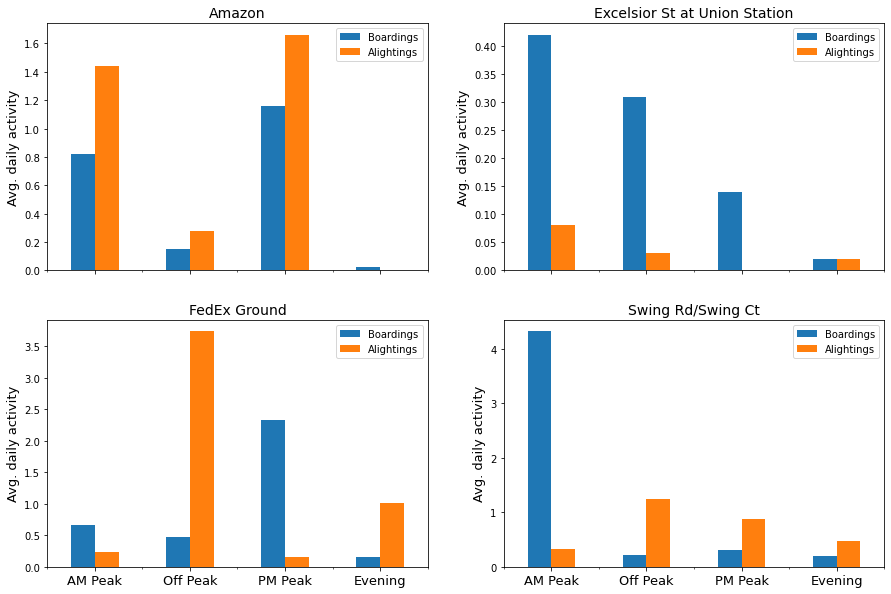

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,10))

new_stop_activity_by_period.iloc[new_stop_activity_by_period.index.isin(['Amazon'], level=0)] \
    .plot(kind='bar', ax=axes[0, 0])
new_stop_activity_by_period.iloc[new_stop_activity_by_period.index.isin(['Excelsior St at Union Station'], level=0)] \
    .plot(kind='bar', ax=axes[0, 1])
new_stop_activity_by_period.iloc[new_stop_activity_by_period.index.isin(['FedEx Ground'], level=0)] \
    .plot(kind='bar', ax=axes[1, 0])
new_stop_activity_by_period.iloc[new_stop_activity_by_period.index.isin(['Swing Rd/Swing Ct'], level=0)] \
    .plot(kind='bar', ax=axes[1, 1])

axes[0, 0].set_title('Amazon', fontsize=14)
axes[0, 1].set_title('Excelsior St at Union Station', fontsize=14)
axes[1, 0].set_title('FedEx Ground', fontsize=14)
axes[1, 1].set_title('Swing Rd/Swing Ct', fontsize=14)


axes[1, 0].set_xlabel('')
axes[1, 1].set_xlabel('')
axes[1, 0].set_xticklabels(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], rotation=0, fontsize=13)
axes[1, 1].set_xticklabels(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], rotation=0, fontsize=13)

axes[0, 0].set_ylabel('Avg. daily activity', fontsize=13)
axes[0, 1].set_ylabel('Avg. daily activity', fontsize=13)
axes[1, 0].set_ylabel('Avg. daily activity', fontsize=13)
axes[1, 1].set_ylabel('Avg. daily activity', fontsize=13)

plt.show()

#### *** Please pay attention to the y-axis labels. They are different for each plot. ***

The plots above show the activity throughout the day for the new stops in the PART Express network. We can see each stop has its own unique behavior. For example, at Amazon, there are boardings and alightings during the AM Peak and PM Peak windows while down the road at FedEx Ground, there are a high number of alightings during Off Peak service and a relatively large number of boardings during the PM Peak window. The chart for Excelsior St at Union Station can be somewhat deceiving. Notice the y-axis contains very small values indicating very little utilization of this stop. Looking at the final stop, Swing Rd/Swing Ct, we can see most passengers board during the AM Peak service and appear to get dropped off throughout the other service windows.

### Top 5 Stops / Trips by Boardings

In [15]:
df.nlargest(5, 'Boardings')

,Day of Week,Route ID,Direction,Stop Sequence,Boardings,Alightings,Load,Stop Code,Stop Name,Latitude,Longitude,Route Name,Service Period,Trip Time
306,WKDY,2,Dir = 0,0,9.97,0.0,9.97,142,Greensboro Depot Slip 16,36.069225,-79.787254,2 - Greensboro Express,AM Peak,06:15:00
1471,WKDY,2,Dir = 1,0,7.44,0.0,7.44,100,Coble Transportation Center,36.093620,-79.959170,2 - Greensboro Express,PM Peak,16:45:00
1464,WKDY,2,Dir = 1,0,7.06,0.0,7.06,100,Coble Transportation Center,36.093620,-79.959170,2 - Greensboro Express,PM Peak,15:45:00
1484,WKDY,2,Dir = 1,0,6.00,0.0,6.00,100,Coble Transportation Center,36.093620,-79.959170,2 - Greensboro Express,Evening,18:15:00
4145,WKDY,4,Dir = 1,1,5.82,0.0,7.21,3239,Manning Dr at UNC Hospitals,35.903563,-79.051860,4 - Alamance-Burlington Express,PM Peak,16:30:00


The table above shows the trip/stop combinations with the highest number of average daily boardings. We can see that the top 4 are from Route 2 while fifth place is held by Route 4. The most average daily boardings occur on Route 2 when it is leaving the Greensboro Depot at 6:15 AM heading to the CTC. The other Route 2 are in the afternoon when the bus is leaving the CTC and heading to downtown Greensboro. The Route 4 trip is first one in the afternoon that goes all the way back to the CTC. We can grab those stops and see where those passengers are getting off the bus.

In [16]:
route4_1630 = df.loc[
    (df['Route ID'] == 4) &
    (df['Direction'] == 'Dir = 1') &
    (pd.to_datetime(df['Trip Time'], format='%H:%M:%S') == pd.to_datetime('16:30:00', format='%H:%M:%S'))
].sort_values(by='Stop Sequence')

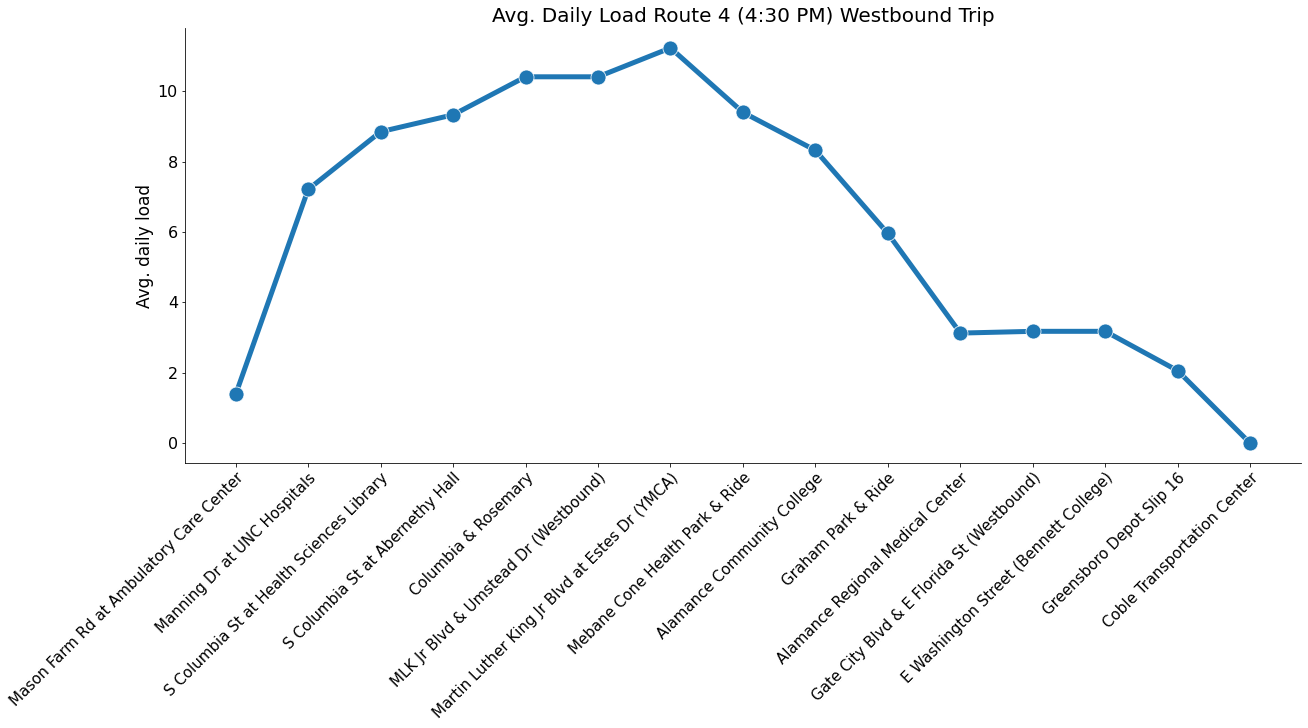

In [17]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(
    x='Stop Name',
    y='Load',
    data=route4_1630,
    marker='o',
    markersize=15,
    linewidth=5
)

plt.title('Avg. Daily Load Route 4 (4:30 PM) Westbound Trip', fontsize=20)
plt.xticks(rotation=45, rotation_mode='anchor', horizontalalignment='right', fontsize=15)
plt.yticks(fontsize=16)
plt.xlabel('')
plt.ylabel('Avg. daily load', fontsize=17)

sns.despine()
plt.show()

The line chart above shows the average daily load for the 4:30 PM westbound trip on Route 4. What the graph reveals is that very few passengers board at the Ambulatory Care Center stop. Most passengers utilize the Manning Dr at the parking deck stop. Some of the other stops throughout downtown Chapel Hill are utilized as well which we can see as the load climbs until it reaches its peak at the MLK at YMCA stop. Then as the bus passes through the series of park & ride lots in Alamance County, we see the load fall. We can also see that a few passengers disembark at the Greensboro Depot and then a few at the CTC as well.

Let's take a look at how the 4:30 PM trip compares to the other westbound trips on Route 4.

In [18]:
route4_wb = df.loc[
    (df['Route ID'] == 4) &
    (df['Direction'] == 'Dir = 1')
].sort_values(by='Stop Sequence')

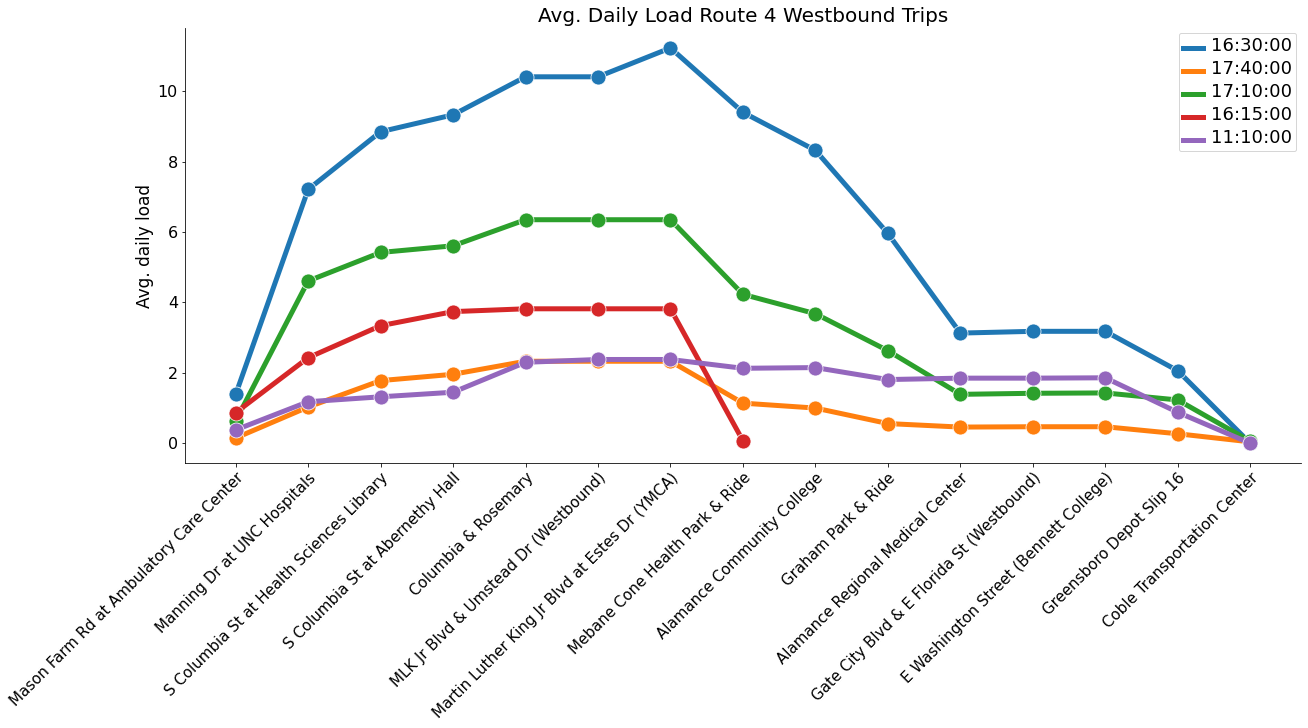

In [32]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(
    x='Stop Name',
    y='Load',
    data=route4_wb,
    hue='Trip Time',
    marker='o',
    markersize=15,
    linewidth=5
)

plt.title('Avg. Daily Load Route 4 Westbound Trips', fontsize=20)
plt.xticks(rotation=45, rotation_mode='anchor', horizontalalignment='right', fontsize=15)
plt.yticks(fontsize=16)
plt.xlabel('')
plt.ylabel('Avg. daily load', fontsize=17)

leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=5)
plt.setp(leg_texts, fontsize=18)

sns.despine()
plt.show()

Let's take a look at how some of the other routes perform and are being utilized.

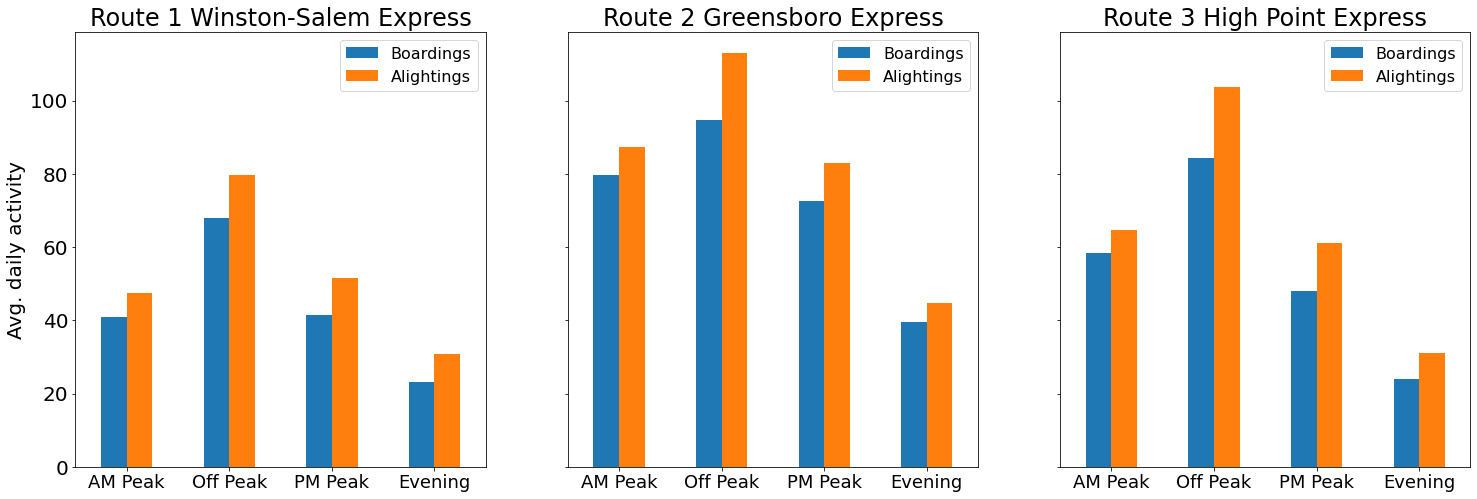

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(25,8))

df.loc[df['Route ID'] == 1].groupby('Service Period').agg({
    'Boardings': 'sum',
    'Alightings': 'sum'
}).reindex(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], axis=0).plot(kind='bar', ax=axes[0])

df.loc[df['Route ID'] == 2].groupby('Service Period').agg({
    'Boardings': 'sum',
    'Alightings': 'sum'
}).reindex(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], axis=0).plot(kind='bar', ax=axes[1])

df.loc[df['Route ID'] == 3].groupby('Service Period').agg({
    'Boardings': 'sum',
    'Alightings': 'sum'
}).reindex(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], axis=0).plot(kind='bar', ax=axes[2])

axes[0].set_title('Route 1 Winston-Salem Express', fontsize=24)
axes[1].set_title('Route 2 Greensboro Express', fontsize=24)
axes[2].set_title('Route 3 High Point Express', fontsize=24)

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')

axes[0].set_xticklabels(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], rotation=0, fontsize=18)
axes[1].set_xticklabels(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], rotation=0, fontsize=18)
axes[2].set_xticklabels(['AM Peak', 'Off Peak', 'PM Peak', 'Evening'], rotation=0, fontsize=18)

axes[0].set_ylabel('Avg. daily activity', fontsize=20)

axes[0].legend(loc=1, prop={'size': 16})
axes[1].legend(loc=1, prop={'size': 16})
axes[2].legend(loc=1, prop={'size': 16})

matplotlib.rc('ytick', labelsize=20)

plt.show()